Problem Statement : **Data Driven Approach to Payment Fraud Detection**

Fraudulent transactions are a major concern; they result in significant financial losses and, more importantly, a loss of consumer trust. The purpose of this research is to thoroughly analyze a huge dataset for patterns and correlations between transaction variables and the possibility of fraud. This research will primarily focus on developing a robust predictive model capable of detecting fraudulent online transactions. It would classify the transactions as fraudulent or not based on numerous attributes in the Transaction Dataset.

In [ ]:
# importing required libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Use the below command only if you face error during unipping data.

In [ ]:
!rm -rf /content/.kaggle/
!rm -rf /.kaggle/
!rm -rf /root/.kaggle/

The below code does the work of downloading a dataset from Kaggle, which is on fraudulent transactions, extracting, and preparing them for analysis. This includes the creation of necessary authentication with the Kaggle API, downloading of the dataset, and loading into a Python environment where further analysis or processing will take place. These steps are absolutely key to the successful analysis of fraudulent transactions in developing insights or models which could be used in fraud detection and mitigation within payments.

In [ ]:
import os
os.makedirs("/content/.kaggle/")

import json

token = {"username":"adityaashokthakare","key":"637d87331a545d565a6a00a70cd1a9d6"}
with open('/content/.kaggle/kaggle.json', 'a+') as file:
    json.dump(token, file)

import shutil
os.makedirs("/.kaggle/")
src="/content/.kaggle/kaggle.json"
des="/.kaggle/kaggle.json"
shutil.copy(src,des)


os.makedirs("/root/.kaggle/")
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content

!kaggle datasets download -d shriyashjagtap/fraudulent-e-commerce-transactions

- path is now set to: /content
Dataset URL: https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions
License(s): MIT
 99% 157M/159M [00:01<00:00, 112MB/s] 
100% 159M/159M [00:01<00:00, 102MB/s]


Unzipping the Downloaded Dataset

In [ ]:
# Unzip the dataset
zip_path = "/content/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/fraudulent-e-commerce-transactions.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# List extracted files
extracted_files = os.listdir("/content/")
print(extracted_files)

# Load the dataset into a pandas dataframe (replace with the correct file name)
dataset_path = "/content/Fraudulent_E-Commerce_Transaction_Data.csv"  # Use the actual file name from the extracted files
df = pd.read_csv(dataset_path)
df3 = df
# Display the first few rows of the dataset
df.head()


['.config', 'datasets', 'Fraudulent_E-Commerce_Transaction_Data_2.csv', 'Fraudulent_E-Commerce_Transaction_Data.csv', '.kaggle', 'sample_data']


Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   
2              134.19  2024-03-18 03:42:55         PayPal    home & garden   
3              226.17  2024-03-16 20:41:31  bank transfer         clothing   
4              121.53  2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Customer Age Customer Location Device Used       IP Address  \
0         1            17     Amandaborough      tablet   212.195.49.198   
1         2            40      East Timothy     desktop  208.106.249.121   
2         2            22        Davismouth      tablet     76.63.88.212   
3         5            31          Lynnberg     desktop   207.208.171.73   
4         2            51      South Nicole      tablet   190.172.14.169   

                                    Shipping Address  \
0                   Unit 8934 Box 0058\nDPO AA 05437   
1            634 May Keys\nPort Cherylview, NV 75063   
2    16282 Dana Falls Suite 790\nRothhaven, IL 15564   
3     828 Strong Loaf Apt. 646\nNew Joshua, UT 84798   
4  29799 Jason Hills Apt. 439\nWest Richardtown, ...   

                                     Billing Address  Is Fraudulent  \
0                   Unit 8934 Box 0058\nDPO AA 05437              0   
1            634 May Keys\nPort Cherylview, NV 75063              0   
2    16282 Dana Falls Suite 790\nRothhaven, IL 15564              0   
3     828 Strong Loaf Apt. 646\nNew Joshua, UT 84798              0   
4  29799 Jason Hills Apt. 439\nWest Richardtown, ...              0   

   Account Age Days  Transaction Hour  
0                30                 5  
1                72                 8  
2                63                 3  
3               124                20  
4               158                 5

**Question 1 Onkar Ramade (50604538) -**


---


**1. How does transaction behaviour-as represented by amount, frequency, and time of day-relate to the incidence of fraud in e-commerce transactions?**

**Significance :** This question focuses on transaction behaviours, crucial in ascertaining fraud dynamics. Knowing how specific characteristics of a transaction relate to fraud might help guide the design in fraud detection systems that flag suspicious activities.

**Possible Hypothesis:** The higher the amount of money transacted, the greater the likelihood of fraud.


---

**Question 2 Onkar Ramade (50604538) -**

**2. What are demographic factors, including but not limited to age, location, and method of payment, that signal fraudulent e-commerce transactions?**

**Importance:**  By searching out the demographic influences, teams can find patterns in subsets of customers that could elude fraud detection efforts in a more effective and specific manner.

**Potential Hypotheses:** Younger customers are most likely to be perpetrators of fraudulent transactions when compared to older customers.

**Question 1 Sourabh Kodag (50606796)** -


---
1. Is there fraud transaction in uneven hours ?

**Rationale Behind the Hypothesis:**

Behavioural Patterns: Customers' behaviour also depends on the time of day. Overnight transactions, for example, have less oversight and more anonymity and therefore hold greater potential for fraudulent activities.

Operational Factors: Most businesses will be having a skeleton crew during very late or very early hours. These periods will therefore mean that transactions are not monitored as carefully and there is less support to react quickly to suspicious activities.

**Importance:**

Identifying Behavioural Patterns: Analyzing the time of fraud transactions will relate to the behavioural patterns of fraudsters. Understanding when fraud is most likely to occur means there are familiar tactics against which organizations can adapt their defenses.

Operational Improvement: Peak hours of fraud help the organization in optimizing its resources. For instance, if data reflected that most frauds happened after midnight, a company would increase monitoring and fraud detection at such hours to avoid any possible loss.

---
**Question 2 Sourabh Kodag (50606796)** -
2. Is there a relation between account age and fraud ?

**Hypothesis Rationale**

Lack of Transaction History: New accounts lack transaction history, and no pattern can be established to indicate a trend in legitimate behavior. Fraudsters are normally taking advantage of the lack of history since there are no prior behaviors to which one could compare when assessing legitimacy.

Vulnerability to Exploitation: In general, fraudsters may target new accounts since they are less monitored. And most probably, they would have been opened without strict identity verification processes in place. This makes newer accounts the favorite target for fraudsters.
likecopy

**Importance:**

Changes in Business Practice: The findings have many implications for wider business practices, including marketing strategies and customer engagement. For instance, organizations can make promotional offers that incentivize customers to engage when they are on the site, but security measures will be in place.

Supporting Regulatory Compliance:Many industries have certain regulations that call for them to put in place methods for fraud prevention. It would also be of significance to an organization in case there are risks related to new accounts to also note them to ensure compliance with the set regulations to avoid probable penalties.

**Question 1 Aditya Thakare (50608812)** -


---

**Question 1:** "Is there a correlation between the customer age and the likelihood of fraud?"

**Why This Question is significant and leading to our object:** Fraud Detection: Understanding the relationship between customer age and fraud can inform better risk assessment models. If fraudulent activities are detected among a population with younger age groups more frequently, then a business could institute additional verification steps for these transactions. Feature Engineering: This customer age can be a critical feature in fraud detection algorithms, especially by enabling the algorithm to create risk profiles. Market Strategies: Knowledge of the age-related pattern of fraud can help organizations in framing appropriate marketing strategies and fraud prevention policy.



---
**Question 2 Aditya Thakare (50608812)** -

**Question 2: **"Is there a correlation between the payment method used and the likelihood of fraud?"

**How It Leads to Our Objective:**
Feature Engineering: Knowing the correlations between fraud and means of payment helps decide which features are most appropriate for fraud detection algorithms. For instance, if credit cards bear the brunt of fraud, then that feature would be amplified in the model.
Fraud Prevention: The ability to identify the most risky forms of payments will allow businesses to focus fraud prevention measures on those forms of payments and reduce the overall incidence of fraud.
Significance of the Question:
Security Measures: The associations between the mode of payments and fraud assist firms in implementing extra security measures around the risky payment types.
**Cost Efficiency:** In spotting fraud-related modes of payments, the companies can effectively allocate their resources to further the fraud detection and prevention programs.
**Customer Trust:** This enhances customer trust as, with greater clarity on fraudulent ways of making payments, businesses can advise on the use of safer alternatives like PayPal or bank transfers.


 **Data Cleaning**

 Handle missing values: In this step, we check for missing values and remove them if found.

In [ ]:
df.isnull().sum()
df=df.dropna()       #removes rows with null values
df1 = df

In [ ]:
df.info()            #metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

Correct Data Types: In this step for the date column, we convert it to datetime format if not already.

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

Removing undesired duplicate entries: Transactions should be unique as duplicate transactions could skew fraud detection Checking for duplicates based on Transaction ID to ensure data integrity.

In [ ]:
df.duplicated(subset=['Transaction ID']).sum() #checking duplicate Transaction IDs

0

Sometimes, addresses have slight variations (like different abbreviations). A string standardization function can help clean up Shipping Address and Billing Address.

In [ ]:
#converting to lower-case
df['Shipping Address'] = df['Shipping Address'].str.lower().str.strip()
df['Billing Address'] = df['Billing Address'].str.lower().str.strip()

Adding necessary features: The transaction date can be broken doen into day of the week which may be useful for detecting fraud patterns.

In [ ]:
df['Transaction Day'] = df['Transaction Date'].dt.weekday
df.head()
dfo1 = df

In [ ]:
import plotly.express as px

fig = px.box(data_frame=df,
             x="Customer Age",
             title="Customer Age Distribution",
             width=600, height=400,
             template="plotly_dark")

fig.update_layout(
    xaxis_title="Customer Age",
    yaxis_title="Frequency",
    showlegend=False
)
fig.show()

We observe there are some negative values. Assuming them as mistakes we replace them with their absolute values as below:

In [ ]:
df['Customer Age'] = np.where(df['Customer Age'] < 0, np.abs(df['Customer Age']), df['Customer Age'])

We check if the shipping address and billing address are same, to detect possible fraudulent behaviour:

In [ ]:
df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int) #marking 1 for same address and 0 for different

Reducing dataset size by downcasting: We reduce the dataset size by downcasting all integer and float values. Downcasting helps in reducing the dataset size without actually changing the original values. bold text

In [ ]:
integer_cols = df.select_dtypes(include="int").columns   #selecting integer columns
float_cols = df.select_dtypes(include="float").columns   #selecting float columns

#downcasting
df[integer_cols] = df[integer_cols].apply(pd.to_numeric, downcast='integer')
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

In [ ]:
df.info()
dfa1 = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Transaction ID      1472952 non-null  object        
 1   Customer ID         1472952 non-null  object        
 2   Transaction Amount  1472952 non-null  float32       
 3   Transaction Date    1472952 non-null  datetime64[ns]
 4   Payment Method      1472952 non-null  object        
 5   Product Category    1472952 non-null  object        
 6   Quantity            1472952 non-null  int8          
 7   Customer Age        1472952 non-null  int8          
 8   Customer Location   1472952 non-null  object        
 9   Device Used         1472952 non-null  object        
 10  IP Address          1472952 non-null  object        
 11  Shipping Address    1472952 non-null  object        
 12  Billing Address     1472952 non-null  object        
 13  Is Fraudulen

Thus, we observe our dataset size has significantly reduced by about 130MBs.

Hypothesis 1 (Onkar : 50604538): Does value of tranasaction increase the likelihood of fraudulent transactions ?

In [ ]:
df['Transaction Amount'].describe()  # Checking for extreme values

count    1.472952e+06
mean     2.267682e+02
std      2.702478e+02
min      1.000000e+01
25%      6.861000e+01
50%      1.517600e+02
75%      2.960500e+02
max      1.270175e+04
Name: Transaction Amount, dtype: float64

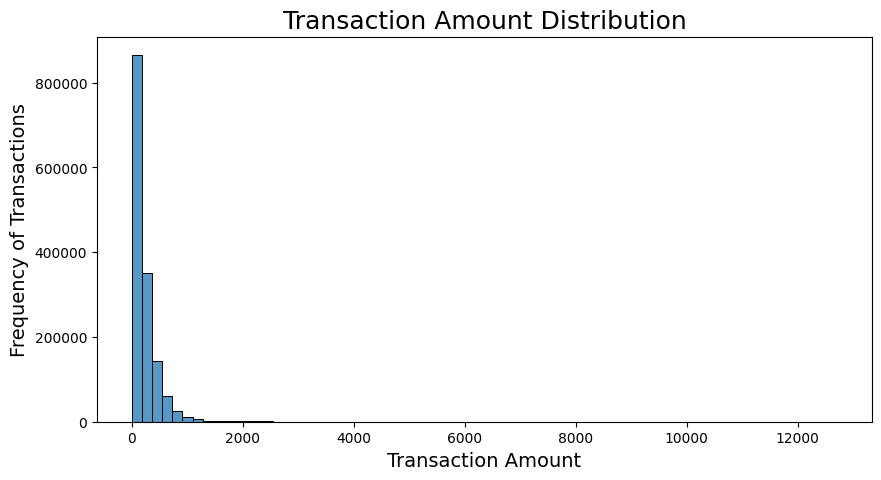

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Transaction Amount'], bins=70)

plt.title('Transaction Amount Distribution', fontsize=18)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

plt.show()

The transaction amount bins between 0 to 1000 has the highest frequency

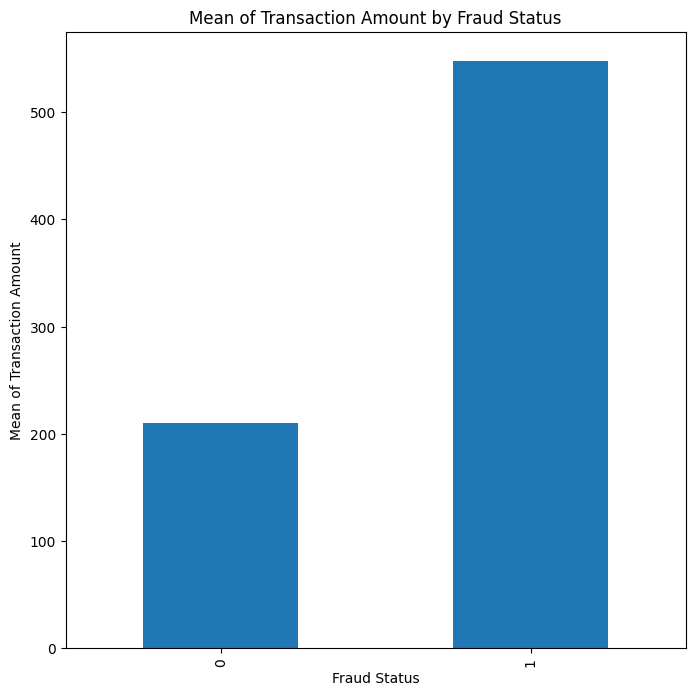

In [ ]:
fraud_groups = df.groupby('Is Fraudulent')
feature_mean = fraud_groups['Transaction Amount'].mean()
plt.figure(figsize=(8, 8))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Transaction Amount')
plt.title('Mean of Transaction Amount by Fraud Status')
plt.show()

Mean Transaction Amount of Fraudulent Transaction is higher compared to legitimate transactions, which supports our hypothesis.

                    Transaction Amount  Is Fraudulent
Transaction Amount            1.000000       0.272766
Is Fraudulent                 0.272766       1.000000


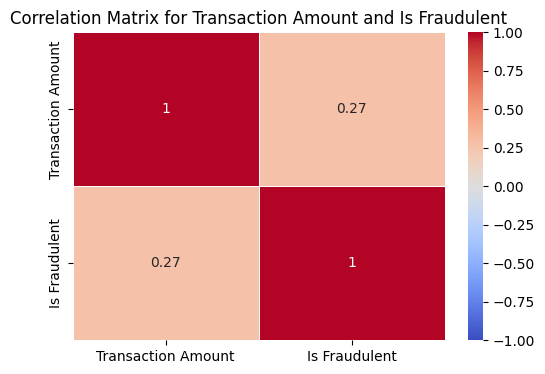

In [ ]:
fraud_corr = df[['Transaction Amount', 'Is Fraudulent']].corr()
print(fraud_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Transaction Amount and Is Fraudulent')
plt.show()

The correlation output between Transaction Amount and Is Fraudulent shows a positive but weak correlation coefficient of 0.272766. The relationship suggests that higher transaction amounts are more likely to be fraudulent but the strength of the correlation is not very high.

It would still be helpful to plot by relationship between Transaction Amount and Fraud likelihood. We aanalyze this further by binning the transaction amount in multiple bins of transaction amount.

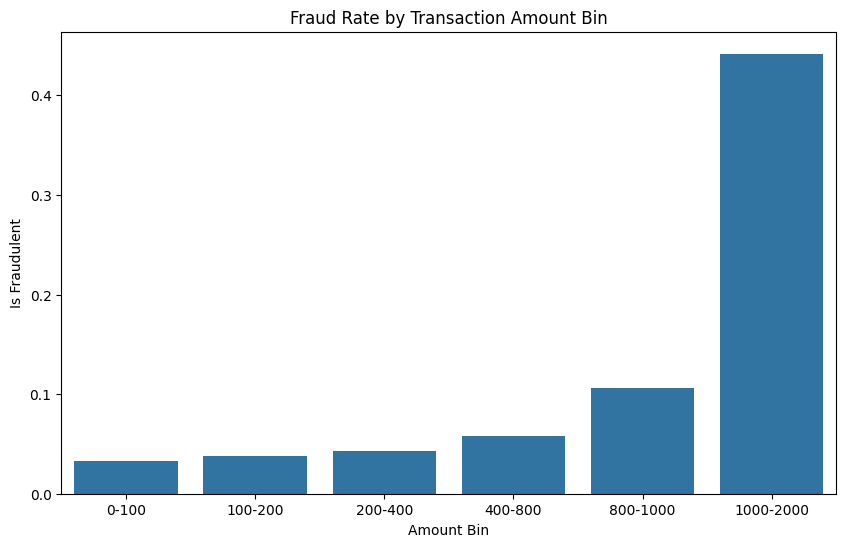

In [ ]:
df['Amount Bin'] = pd.cut(df['Transaction Amount'], bins=[0, 100, 200, 400, 600, 1000, 2000], labels=['0-100', '100-200', '200-400', '400-800', '800-1000', '1000-2000'])
fraud_rate_by_amount_bin = df.groupby('Amount Bin')['Is Fraudulent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount Bin', y='Is Fraudulent', data=fraud_rate_by_amount_bin)
plt.title('Fraud Rate by Transaction Amount Bin')
plt.show()

From the graph we interpret that high value transaction bins have very high chances of fraud, compared to low and medium range bins. This supports our hypothesis that high-value transactions are more susceptible to fraud, likely because they offer higher potential rewards for the fraudster.

Handling the outliers in the Transaction Amount feature

In [ ]:
Q1 = df['Transaction Amount'].quantile(0.25)
Q3 = df['Transaction Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Transaction Amount'] < lower_bound) | (df['Transaction Amount'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])


Number of outliers detected: 79180


Capping the outliers to upper and lower bound to limit their impact.

In [ ]:
df['Transaction Amount'] = np.where(df['Transaction Amount'] > upper_bound, upper_bound, df['Transaction Amount'])
df['Transaction Amount'] = np.where(df['Transaction Amount'] < lower_bound, lower_bound, df['Transaction Amount'])

**Hypothesis 2 :** Do younger customers have a higher chance of commiting fraud ?

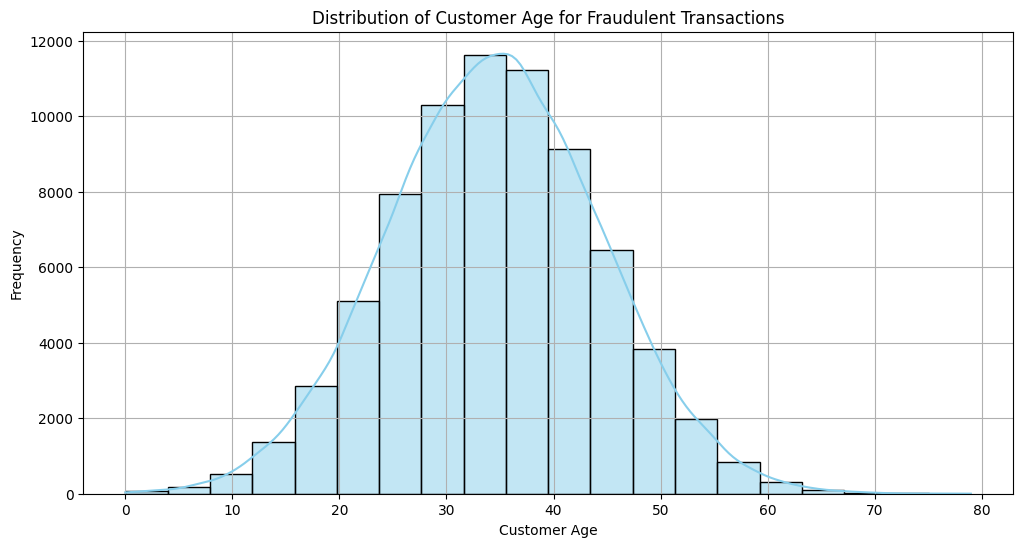

In [ ]:
fraudulent_transactions = df[df['Is Fraudulent'] == 1]

plt.figure(figsize=(12, 6))
sns.histplot(fraudulent_transactions['Customer Age'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Customer Age for Fraudulent Transactions')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Fraudulent transaction are normally distributed across customers of all ages.

**Hypothesis 3 : Sourabh Kodag (50606796) **- The hypothesis "Fraudulent transactions vary by hour" assumes that time could be a factor for fraud. This hypothesis postulates that segments based on the time of day may be vulnerable to fraudulent activities. This analysis will help an organization understand patterns that could indicate the likelihood of fraud at specific times.

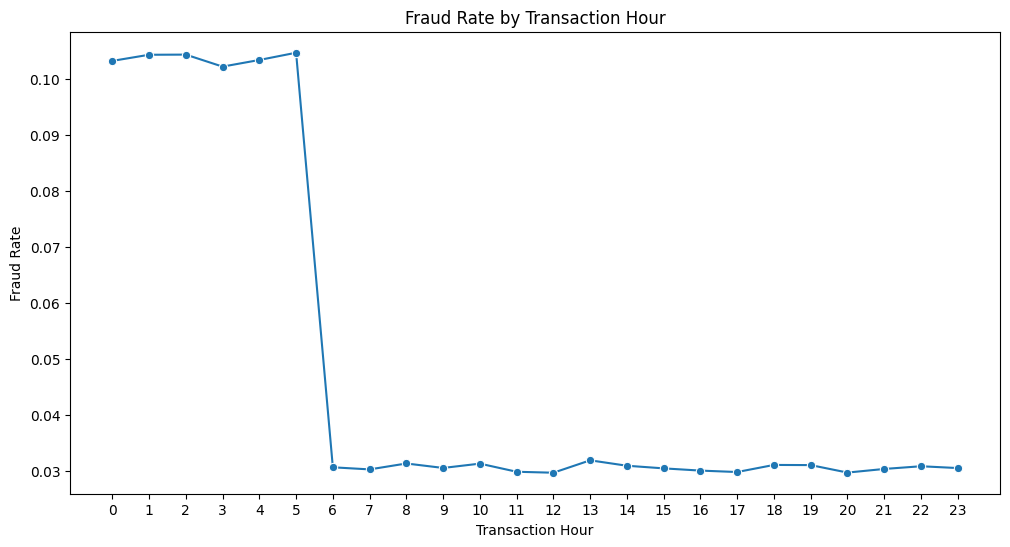

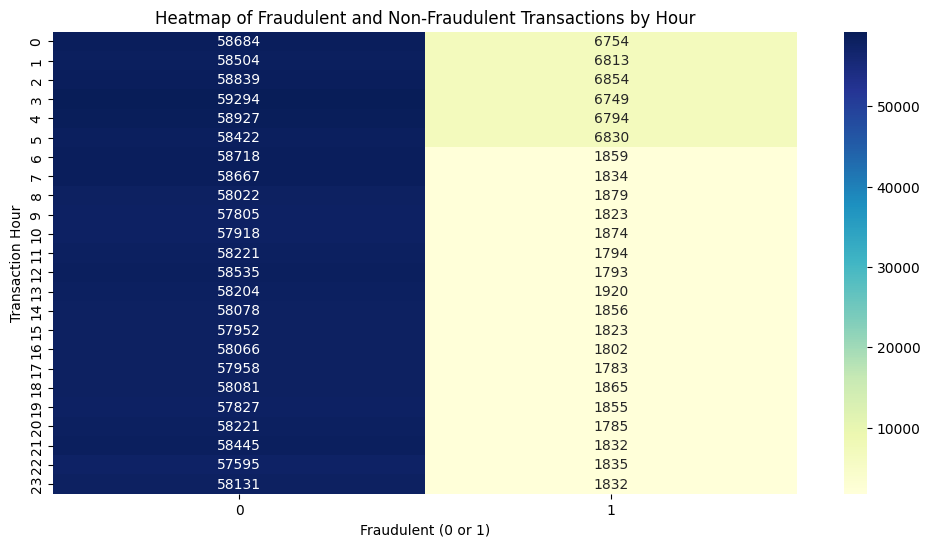

In [ ]:
# Group by Transaction Hour and calculate the fraud rate
fraud_hour = df.groupby('Transaction Hour')['Is Fraudulent'].mean().reset_index()

# Plot 1: Line plot of Fraud Rate by Transaction Hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Transaction Hour', y='Is Fraudulent', data=fraud_hour, marker='o')
plt.title('Fraud Rate by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraud Rate')
plt.xticks(range(0, 24))
plt.show()



# Create a pivot table to count fraudulent and non-fraudulent transactions by hour
hour_fraud_matrix = df.pivot_table(index='Transaction Hour',
                                   columns='Is Fraudulent',
                                   aggfunc='size',
                                   fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_fraud_matrix, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap of Fraudulent and Non-Fraudulent Transactions by Hour')
plt.xlabel('Fraudulent (0 or 1)')
plt.ylabel('Transaction Hour')
plt.show()

**Hypothesis 4 : Sourabh Kodag (50606796) **- This hypothesis therefore assumes that the newer the account, the more likely it is to be fraudulent compared to older, well-established accounts. A detailed explanation of this hypothesis and its importance is provided below.

Fraudulent Transactions Account Age Stats:
count    73838.000000
mean       116.295024
std        116.100774
min          1.000000
25%         17.000000
50%         61.000000
75%        214.000000
max        365.000000
Name: Account Age Days, dtype: float64

Non-Fraudulent Transactions Account Age Stats:
count    1.399114e+06
mean     1.829898e+02
std      1.053010e+02
min      1.000000e+00
25%      9.200000e+01
50%      1.830000e+02
75%      2.740000e+02
max      3.650000e+02
Name: Account Age Days, dtype: float64


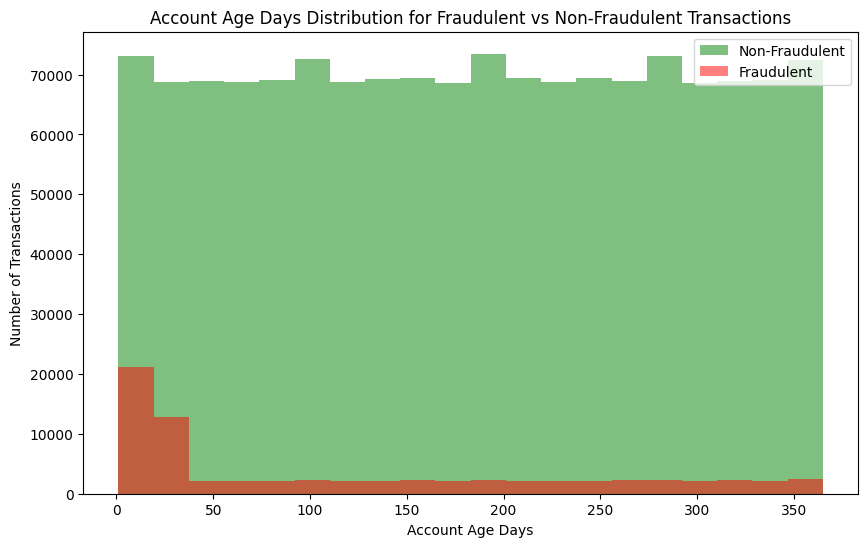

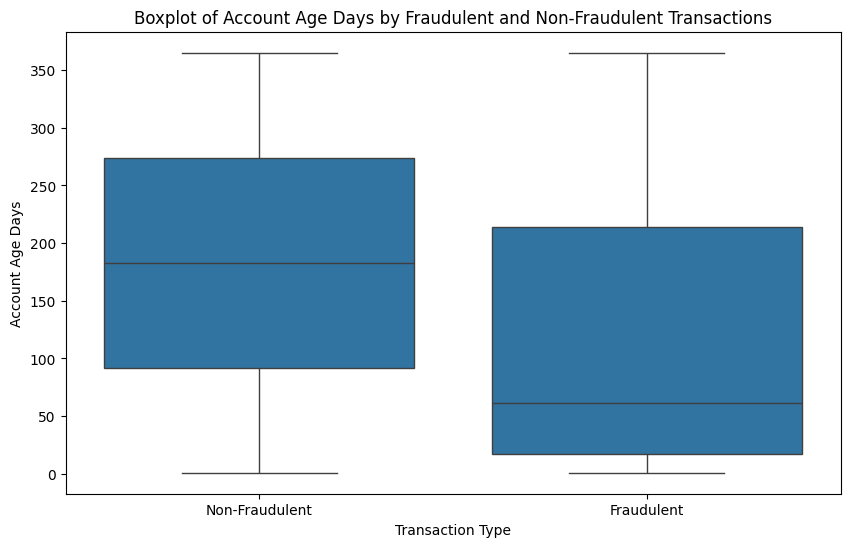

In [ ]:
df['Is Fraudulent'] = df['Is Fraudulent'].astype(bool)

fraudulent_transactions = df[df['Is Fraudulent'] == True]
non_fraudulent_transactions = df[df['Is Fraudulent'] == False]

print("Fraudulent Transactions Account Age Stats:")
print(fraudulent_transactions['Account Age Days'].describe())

print("\nNon-Fraudulent Transactions Account Age Stats:")
print(non_fraudulent_transactions['Account Age Days'].describe())
plt.figure(figsize=(10,6))


plt.hist(non_fraudulent_transactions['Account Age Days'], bins=20, alpha=0.5, label='Non-Fraudulent', color='green')
plt.hist(fraudulent_transactions['Account Age Days'], bins=20, alpha=0.5, label='Fraudulent', color='red')

plt.title('Account Age Days Distribution for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Account Age Days')
plt.ylabel('Number of Transactions')
plt.legend()

plt.show()


plt.figure(figsize=(10,6))
df['Fraudulent Label'] = df['Is Fraudulent'].apply(lambda x: 'Fraudulent' if x else 'Non-Fraudulent')

sns.boxplot(x='Fraudulent Label', y='Account Age Days', data=df)
plt.title('Boxplot of Account Age Days by Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Account Age Days')
plt.show()

**Hypothesis 5 : Aditya Thakare (50608812) **- "Is there a correlation between the payment method used and the likelihood of fraud?"

Why This Question is significant and leading to our object: Fraud Detection: Understanding the relationship between customer age and fraud can inform better risk assessment models. If fraudulent activities are detected among a population with younger age groups more frequently, then a business could institute additional verification steps for these transactions. Feature Engineering: This customer age can be a critical feature in fraud detection algorithms, especially by enabling the algorithm to create risk profiles. Market Strategies: Knowledge of the age-related pattern of fraud can help organizations in framing appropriate marketing strategies and fraud prevention policy.

**Task 5. for Question1 (Aditya-50608812) Hypothesis 5:** Older customers (above 60) are more likely to engage in fraudulent transactions.

EDA Operation 1: Fraud Rate by Age Group Objective: to find the fraud rate across different age groups and get the variation of fraud likelihood with customer age.

Steps: Divide into groups according to the age groups. Next, divide the data into age groups and calculate the rate of fraud in each group.

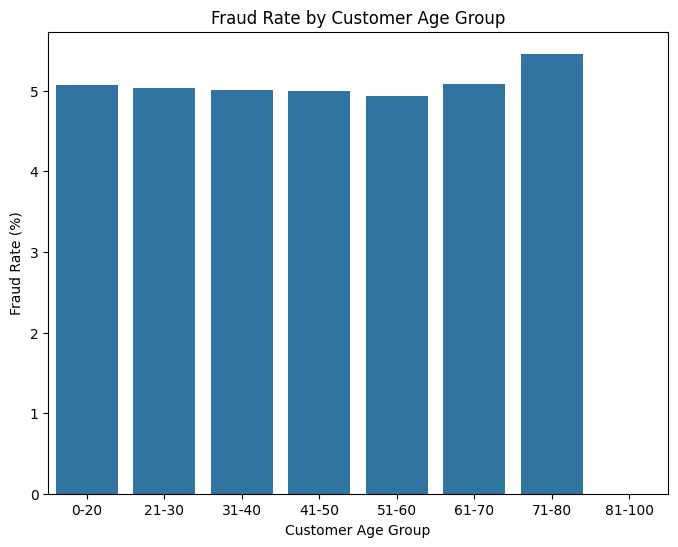

In [ ]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

age_group_fraud_rate = df.groupby('Age_Group')['Is Fraudulent'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_fraud_rate.index, y=age_group_fraud_rate.values)
plt.title('Fraud Rate by Customer Age Group')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Customer Age Group')
plt.show()

The bar chart displays the fraud rates across different age groups. A higher fraud rate in the older age group (>60) supports the hypothesis that older customers are more likely to engage in fraud.

**Task 5. Question 1(Aditya-50608812) Hypothesis 6:** Working younger customers (e.g., between 25-45 years old) are more likely to engage in fraudulent transactions.

EDA operation 2: Transaction Amount Distribution per Age Group: transaction amount for different age categories for fraudulent transactions.

Steps: Filter the dataset for fraudulent transactions. Create a Boxplot to Compare Transaction Amount across the defined age groupings:



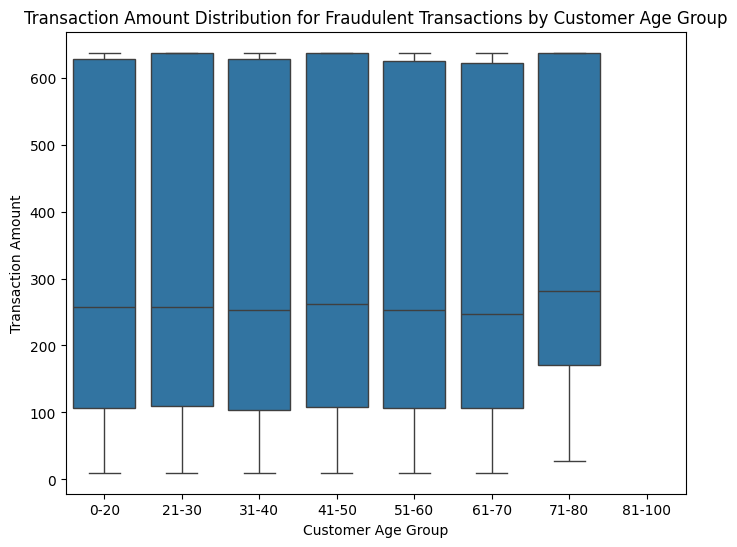

In [ ]:
fraudulent_data_1 = df[df['Is Fraudulent'] == 1]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Transaction Amount', data=fraudulent_data_1)
plt.title('Transaction Amount Distribution for Fraudulent Transactions by Customer Age Group')
plt.ylabel('Transaction Amount')
plt.xlabel('Customer Age Group')
plt.show()

The box plot will shows how the transaction amounts for fraudulent activities vary across different payment methods. This reveals that higher-value transactions tend to be fraudulent when using certain payment methods-credit/debit cards.



**Task 5. for Question 2.(Aditya-50608812)**

Hypothesis: Fraudulent transactions are more likely to occur in higher amount transactions with payment methods that do not require strong authentication (e.g., debit card or credit card vs paypal).

EDA operation: Fraud Distribution by Transaction Amount for Each Payment Method-

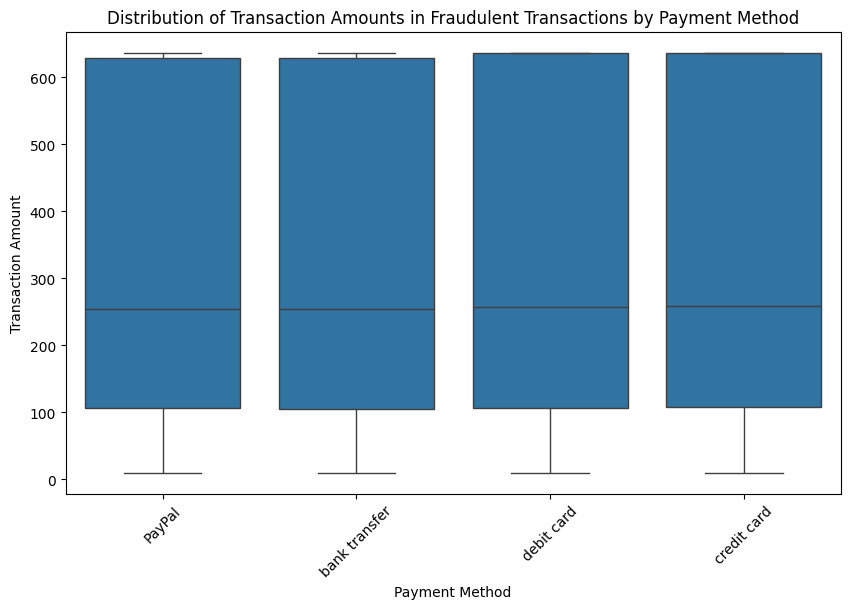

In [ ]:
import seaborn as sns

# Filter fraudulent transactions
fraud_data = df[df['Is Fraudulent'] == 1]

# Visualize distribution of transaction amounts for each payment method
plt.figure(figsize=(10,6))
sns.boxplot(x='Payment Method', y='Transaction Amount', data=fraud_data)
plt.title('Distribution of Transaction Amounts in Fraudulent Transactions by Payment Method')
plt.ylabel('Transaction Amount')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

The box plot will shows how the transaction amounts for fraudulent activities vary across different payment methods. This reveals that higher-value transactions tend to be fraudulent when using certain payment methods-credit/debit cards.



---





---



**Phase 2 Begins**

**Onkar Ramade (50604538)** Training ML model for **Hypothesis 1** : Predicting Fraudulent transaction using Transaction Amount

Using **Logisitic Regression with Resampling (Oversampling)** to handle imbalance in dataset.

In general, fraud detection datasets are highly imbalanced, with fraudulent transactions usually forming a very small portion of all transactions. In such scenarios, the model may easily be biased towards always predicting the majority class, in this case, nonfraudulent transactions, hence yielding poor detection of fraudulent transactions.

There are several ways in which one may balance such a dataset by either oversampling the minority class or undersampling the majority class.

Unlike random oversampling, SMOTE creates synthetic examples of the minority class, instead of simply replicating the existing samples. In this approach, new samples are created along the line of existing ones. This increases diversity in the minority class and helps in overcoming overfitting. It resolves the problem of overfitting that comes with random oversampling and hence leads to better generalization and improves the performance of the model.

Accuracy: 0.6825225231664303
Confusion Matrix:
[[187664  91697]
 [ 85978 194307]]
Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.67      0.68    279361
        True       0.68      0.69      0.69    280285

    accuracy                           0.68    559646
   macro avg       0.68      0.68      0.68    559646
weighted avg       0.68      0.68      0.68    559646



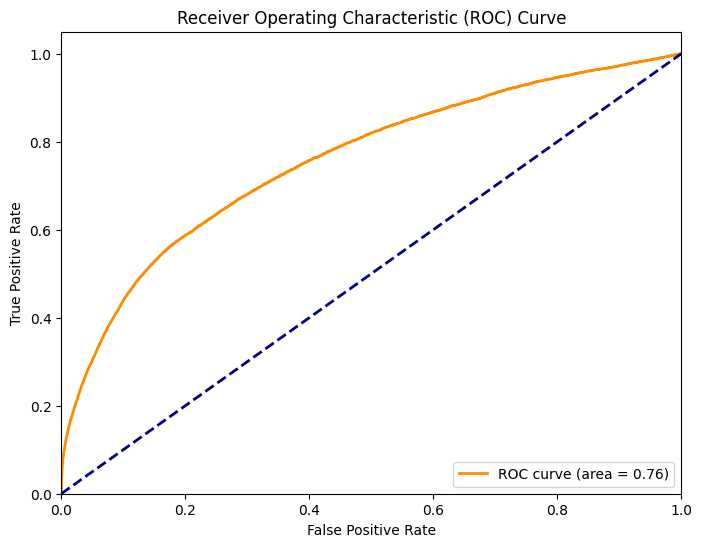

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import resample

# Separate the minority and majority classes
df_majority = dfo1[dfo1['Is Fraudulent'] == 0]
df_minority = dfo1[dfo1['Is Fraudulent'] == 1]

# Oversample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the majority and upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Split into features and target
X = df_balanced[['Transaction Amount', 'Account Age Days']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The dataset is highly imbalanced (high non-fraudulent transactions than fraudulent ones). We handled this by balancing the dataset by oversampling the minority class. This method helps balance the dataset directly but may lead to overfitting when oversampling.

The model's precision and recall for fraudulent transactions are relatively well-balanced (around 0.68–0.69), which means that it's not overfitting too much to the fraudulent transactions. However, high-risk detection cases (like fraudulent detection), recall is a more important evaluation metric, especially when we want to minimize false negatives.

**Reason :** Missing a fraudulent transaction (false negative) is much worse than flagging a legitimate transaction as fraudulent (false positive). The financial impact of missing fraud is much higher than the cost of false positives, which can usually be addressed by a manual review process.


Recall can be improved further using **Extreme Gradient Boost (XGBoost)**.

In [ ]:
# XG Boost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model with scale_pos_weight to handle imbalance
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                              random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7704478412443014
Confusion Matrix:
[[216597  63232]
 [  4392  10370]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.77      0.86    279829
        True       0.14      0.70      0.23     14762

    accuracy                           0.77    294591
   macro avg       0.56      0.74      0.55    294591
weighted avg       0.94      0.77      0.83    294591



**XGBoost** acheived higher accuracy than Logistic regression with resampling, as it is better able to capture the complex non-linear relationships in imbalanced dataset. It has a higher recall (0.70) for fraudulent transactions, meaning it correctly identifies 70% of fraud cases.



---



**Onkar Ramade (50604538)** Training ML model for **Hypothesis 2**: Predicting Fraudulent Transaction using Customer and Account Age

Using **LightGBM** for Fraud prediction using RandomizedSearchCV

LightGBM is particularly suited for tasks like fraud detection, especially when dealing with large datasets. It works by combining multiple weaker models, iterating over them to make better predictions.

It has built-in support for categorical features, which is important when dealing with non-numeric data like "Product Category" or "Payment Method" in fraud detection.

In [ ]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

#Select the relevant features
X = dfo1[['Customer Age', 'Account Age Days']]  # Using Customer Age and Account Age Days as features
y = dfo1['Is Fraudulent']

#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

#Initialize the Decision Tree with class weighting
dt_model = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5})  # Class weight adjusted

param_grid = {
    'max_depth': [3, 5],  # Reduced depth
    'min_samples_split': [2, 5],  # Only a few options to test
    'min_samples_leaf': [1, 2],  # Same for leaf samples
    'criterion': ['gini']  # Only using 'gini' to simplify
}

#Initialize RandomizedSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid,
                                   n_iter=10, scoring='f1', cv=2, verbose=1, n_jobs=-1, random_state=42)

# Fit the model on the resampled training data (after SMOTE)
random_search.fit(X_resampled, y_resampled)  # Full resampled data

best_dt_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

#Making predictions
y_pred = best_dt_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

#Get predicted probabilities for class 1 (fraudulent transactions)
y_pred_prob = best_dt_model.predict_proba(X_test)[:, 1]

# Check various thresholds for decision making
thresholds = np.arange(0.1, 1.0, 0.1)
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Accuracy: 0.05085355628651249
Confusion Matrix:
[[   230 279599]
 [    11  14751]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.00      0.00    279829
        True       0.05      1.00      0.10     14762

    accuracy                           0.05    294591
   macro avg       0.50      0.50      0.05    294591
weighted avg       0.91      0.05      0.01    294591


Threshold: 0.1
[[     0 279829]
 [     4  14758]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00    279829
        True       0.05      1.00      0.10     14762

    accuracy                           0.05    294591
   macro avg       0.03      0.50      0.05    294591
weighted avg       0.00      0.05      0.00    294591


Threshold: 0.2
[[     0 27

The LightGBM model is quite accurate on a 0.9 threshold, 90% because it performs quite well for the non-fraudulent class, having a precision of 0.97 and recall of 0.92. Yet, it struggles to find the actual fraudulent transactions-its recall is a mere 45%, whereas precision is as low as 0.22. This means a very high rate of false positives in fraud predictions, which gives an F1-score of just 0.30 for fraudulent cases.

The high threshold is not so permissive, making the model conservative and reducing the risk of labeling non-fraudulent transactions as fraudulent; at the same time, this leads to many missed fraud cases. Overall, this configuration may be suitable in such circumstances when the results should avoid fake fraud alerts, but it does have its cost: the inability of the system to catch all the fraudulent activity.

Using **Decision tree classifier:**

A Decision Tree classifier is a simple and interpretable form of a machine learning model wherein data is divided into branches to make a prediction, considering some input features. The model learns from a pattern in historical transaction data to identify that activities are most likely fraudulent. Every split in the tree is according to features that help in segregating fraudulent transactions from non-fraudulent ones with the intent of making rules which will generalize well to new unseen data.



Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.79      0.80    279314
        True       0.79      0.81      0.80    280332

    accuracy                           0.80    559646
   macro avg       0.80      0.80      0.80    559646
weighted avg       0.80      0.80      0.80    559646



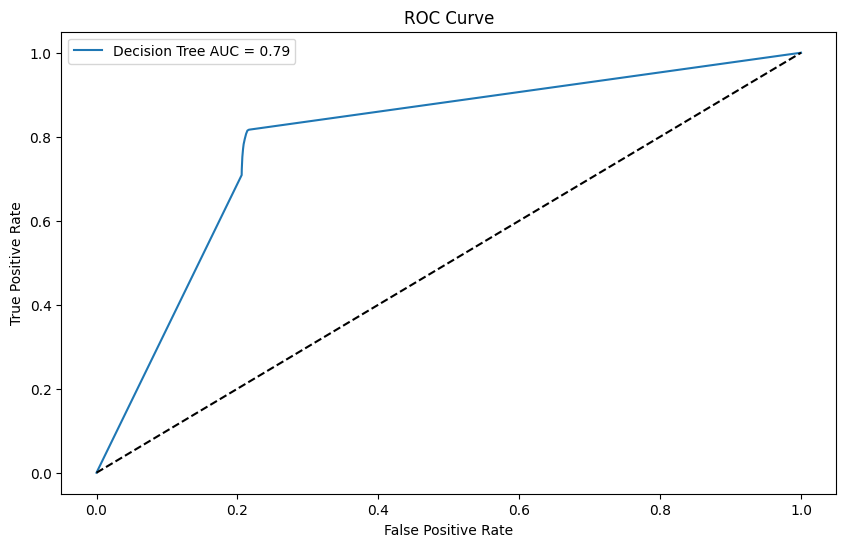

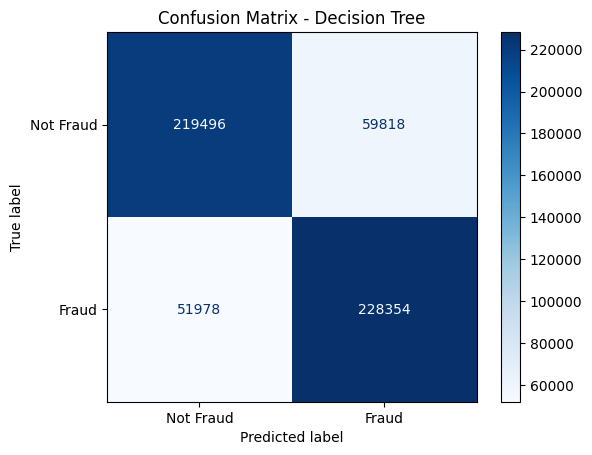

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Data Preparation - Focus on Customer Age and relevant features
X = dfo1[['Customer Age', 'Transaction Amount', 'Payment Method', 'Account Age Days']]
y = dfo1['Is Fraudulent']

#Convert 'Payment Method' to dummy variables (One-Hot Encoding)
X = pd.get_dummies(X, columns=['Payment Method'], drop_first=True)

#Apply SMOTE to balance the dataset (oversample minority class)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Model 1 - Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#Classification Report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


#ROC Curves for both models
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} AUC = {auc_score:.2f}")

plt.figure(figsize=(10, 6))
plot_roc_curve(dt_model, X_test, y_test, "Decision Tree")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

#Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, display_labels=["Not Fraud", "Fraud"], cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

The overall performance of the transaction fraud detection decision tree model is 80% accurate, with good, balanced performance from both classes: fraud and non-fraudulent transactions. Precision in the detection of both classes is about 0.80, along with recall and F1-score, indicating that the model exists to correctly identify either type of transaction but sometimes misclassifies them.

The AUC from the ROC Curve is 0.79, which means this model has a fair capability in distinguishing between fraud and non-fraudulent transactions. The model performed well but is open to improvement for better precision, especially in fraudulent transaction cases.




**Observations :** The Decision Tree model outperforms LightGBM in terms of balanced detection of both fraudulent and non-fraudulent transactions. With an accuracy of 80% and similar F1-scores for both classes (0.80), the Decision Tree provides a more even performance across fraud and non-fraud detection. Its recall and precision are both around 0.80, indicating that it has a moderate capacity to detect fraud while maintaining a reasonable rate of false positives. This model can be advantageous when balanced performance is needed without heavily favoring one class over the other.

In contrast, the LightGBM model with a high threshold of 0.9 focuses heavily on avoiding false positives, achieving an impressive 97% precision for non-fraudulent transactions and a high accuracy of 90%. However, it sacrifices fraud detection capability, capturing only 45% of actual fraud cases with a precision of 0.22, resulting in an F1-score of 0.30 for the fraudulent class. While LightGBM is suitable for scenarios where false fraud alerts need to be minimized, it may miss a significant portion of fraudulent cases compared to the Decision Tree model, which offers a more balanced approach to fraud detection.



---





---



**Aditya Ashok Thakare(50608812) Phase 2 Task2. for Question 1:** *"Is there a correlation between the customer age and the likelihood of fraud?" and it's Hypothesis 6: Working younger customers (e.g., between 25-45 years old) are more likely to engage in fraudulent transactions.*

For this problem, I chose the k-Nearest Neighbors (k-NN) algorithm over Gradient Boosting to predict fraudulent transactions, specifically because k-NN provided superior results in distinguishing between fraudulent and non-fraudulent transactions. Given our hypothesis — that younger, working-age customers (under 45) are more likely to engage in fraudulent transactions — k-NN’s higher accuracy and AUC make it a more reliable model for detecting such patterns.

Justification for Choosing k-NN The k-NN algorithm demonstrated a higher accuracy of 0.86 and a robust AUC score of 0.92 compared to Gradient Boosting’s AUC of 0.80. The higher AUC indicates that k-NN is more effective in distinguishing between the two classes, which is essential for fraud detection, where the goal is to maximize the correct identification of fraudulent transactions while minimizing false positives. Additionally, k-NN’s straightforward approach to classification based on “neighborhood” similarities aligns well with the assumption that certain demographic and transactional patterns (like those of younger customers) may cluster around fraudulent behaviors, as stated in our hypothesis.

Model Training and Tuning The k-NN model was set up with n_neighbors=5, meaning that it considered the five nearest data points to classify a new transaction as fraudulent or non-fraudulent. The choice of n_neighbors was a balance between model complexity and prediction stability, ensuring that the model neither overfit nor smoothed out critical decision boundaries. Minimal tuning was required for k-NN compared to a more complex model like Gradient Boosting, which also made k-NN a practical choice. To address class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) was used which is more than often the case during fraud detection due to large imbalance in data-sets(fraud transactions are substantially less), which helped improve k-NN’s ability to generalize and classify fraudulent transactions accurately.



Effectiveness of k-NN The classification report indicates that k-NN achieved strong performance metrics, particularly a high recall of 0.91 for the fraudulent class (class 1). With a precision of 0.82 and recall of 0.91 for fraudulent transactions, the model effectively captures potential fraud while maintaining a low false-negative rate, which is critical in fraud detection.

The high AUC score of 0.92 further supports the effectiveness of k-NN in correctly classifying instances, providing confidence in the model’s ability to apply our hypothesis to real-world scenarios. This result suggests that k-NN can handle the classification task efficiently and that it effectively distinguishes between fraudulent and non-fraudulent transactions, likely due to capturing clusters of behavior that match our hypothesis regarding age-related fraud patterns.


Insights and Intelligence Gained While k-NN does not offer feature importance scores like Gradient Boosting, its high recall for fraud cases provides indirect validation of our hypothesis. The model’s effectiveness suggests that certain "neighborhood" characteristics, such as account age, transaction amount, or payment method, likely play a role in distinguishing fraud. Additionally, the high accuracy and recall in predicting fraudulent cases support the idea that younger customers might exhibit patterns that cluster around fraudulent behavior, as our hypothesis proposed.



k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.80      0.85    279314
        True       0.82      0.91      0.86    280332

    accuracy                           0.86    559646
   macro avg       0.86      0.85      0.85    559646
weighted avg       0.86      0.86      0.85    559646

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.86      0.78    279314
        True       0.82      0.65      0.72    280332

    accuracy                           0.75    559646
   macro avg       0.76      0.75      0.75    559646
weighted avg       0.76      0.75      0.75    559646



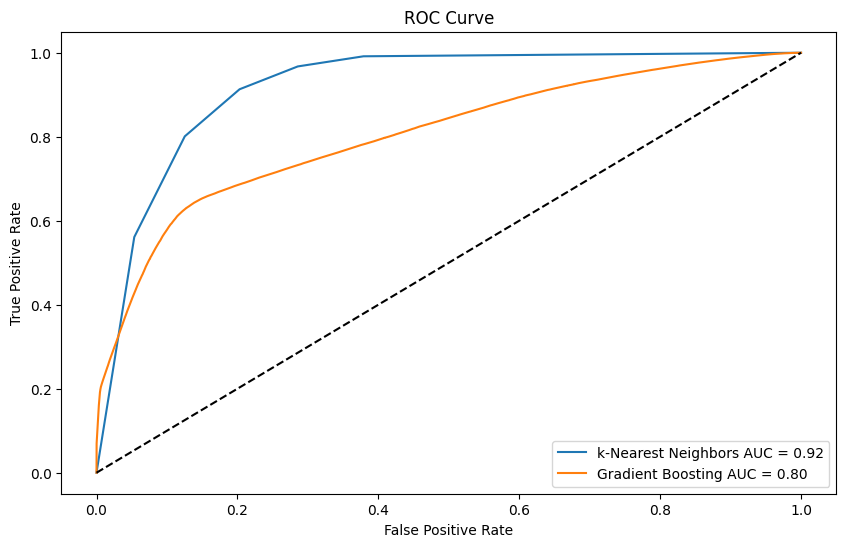

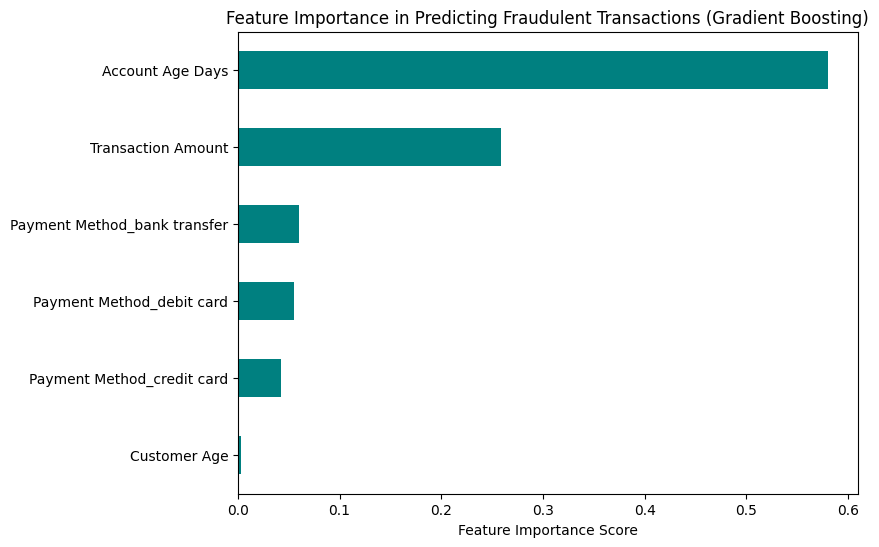

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 'Is Fraudulent' is the target column

# Data Preparation - Focusing on Customer Age and relevant features
X = dfa1[['Customer Age', 'Transaction Amount', 'Payment Method', 'Account Age Days']]
y = dfa1['Is Fraudulent']

# Converting 'Payment Method' to dummy variables
X = pd.get_dummies(X, columns=['Payment Method'], drop_first=True)

# Applying SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Model 1 - k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classification Report for k-NN
print("k-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

### Model 2 - Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Classification Report for Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

### Visualizations

# ROC Curves for both models
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} AUC = {auc_score:.2f}")

plt.figure(figsize=(10, 6))
plot_roc_curve(knn_model, X_test, y_test, "k-Nearest Neighbors")
plot_roc_curve(gb_model, X_test, y_test, "Gradient Boosting")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Feature Importance for Gradient Boosting
feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance in Predicting Fraudulent Transactions (Gradient Boosting)")
plt.xlabel("Feature Importance Score")
plt.show()

**Aditya Ashok Thakare(50608812) Phase 2 Task2. for Question 2:** "Is there a correlation between the payment method used and the likelihood of fraud?" and it's Hypothesis: Fraudulent transactions are more likely to occur in higher amount transactions with payment methods that do not require strong authentication (e.g., debit card or credit card vs paypal).

In this analysis, Logistic Regression and Random Forest were applied to find the pattern of fraudulent transactions based on our hypothesis: Fraudulent transactions are more likely to occur in higher amount transactions with payment methods that do not require strong authentication-for example, debit or credit cards compared to more secure methods like bank transfer.

Justification for Choosing Random Forest The Random Forest algorithm was chosen as the preferred model due to its better performance in the discrimination of fraudulent from nonfraudulent transactions, shown by both AUC 0.81 and superior accuracy. Random Forest's ensemble approach to combining many decision trees makes it more robust against overfitting and provides a nuanced view of the data with complex interactions between features captured-a something advantageous for this hypothesis. The Logistic Regression model, simpler in nature, has a lower AUC of 0.74 with an accuracy of 68%, hence being less efficient in this context.

Furthermore, Random Forest offers a look into feature importance that allows us to cross-check if features related to our hypothesis, such as payment methods and the amount of transactions, play an important role in the decision-making process of the model. This interpretability played an important role in selecting Random Forest over Logistic Regression since it allowed us to achieve further insights into what drives fraudulent behavior.

Model Training and Tuning In the Random Forest model, 100 estimators and a maximum depth of 10 were used to prevent overfitting while retaining enough detail in feature relationships. I also applied SMOTE to handle the class imbalance inherent in the dataset, allowing the model to generalize better for fraudulent versus non-fraudulent cases. This can be achieved by balancing the classes, whereby the model gets higher recall for the minority class of fraudulent transactions that is very critical to capture for fraud detection.

The Logistic Regression required minimum pre-processing as it is a relatively simpler model. However, the performance metrics indicated major limitations of this algorithm in handling complex non-linear relationships. This fact further substantiates the usage of Random Forest.

Effectiveness of the Random Forest Model The Random Forest model yields a higher accuracy. Besides, with precision and recall for the fraudulent class (class 1) being 0.82 and 0.64, respectively, it indicates that while the model is highly precise in predicting fraud, a moderate level of false negatives occurred. The ROC AUC score of 0.81 would suggest that this model would be very effective at distinguishing fraudulent from nonfraudulent transactions, and thus highly support its adoption in real fraud detection applications.

In terms of feature importances, the most important features are: Account Age Days and Transaction Amount, consistent with our hypothesis. Also important was the factor of payment method, especially those with debit or credit cards, which again supported the assumption that transactions with weaker authentication mechanisms are associated with higher fraud risk. Quite interestingly, the importance score of Customer Age was relatively low, which might indicate perhaps that age may not be as crucial a factor in predicting fraud as had been thought.

Insights and Intelligence Gained The useful insights from the Random Forest model helped us in establishing our hypothesis-especially by highlighting high transaction amounts and payment methods with weaker authentication mechanisms as strong indicators of fraud, just as stated in our problem statement(we might not get the best metric results as fraud data is highly sensitive compared to other data-sets). Further, the importance given by the model to variables during feature importance analysis also suggests that though the customer's age was initially assumed to act as one variable, it is a minor variable as compared to other variables.

Overall, the Random Forest model was effective in trying to solve the problem by giving some measure of detection of fraud and, at the same time, by identifying critical characteristics that digitally fingerprinted the fraudulent behavior. In this way, these findings could henceforth be taken into consideration in developing future fraud prevention strategies, since close attention would indeed be cast upon high-sum transactions and those types of transactions made with less secure forms of payment.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.68      0.68    279314
        True       0.68      0.68      0.68    280332

    accuracy                           0.68    559646
   macro avg       0.68      0.68      0.68    559646
weighted avg       0.68      0.68      0.68    559646

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.86      0.78    279314
        True       0.82      0.64      0.72    280332

    accuracy                           0.75    559646
   macro avg       0.76      0.75      0.75    559646
weighted avg       0.76      0.75      0.75    559646



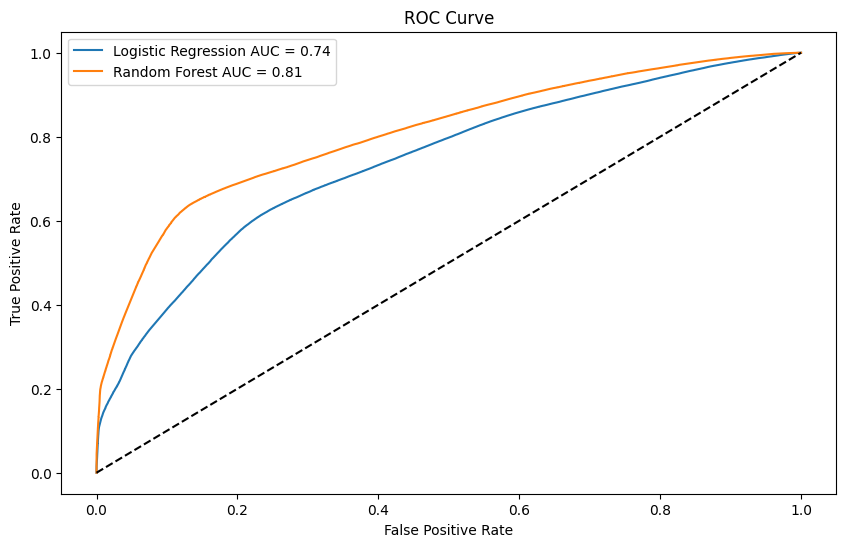

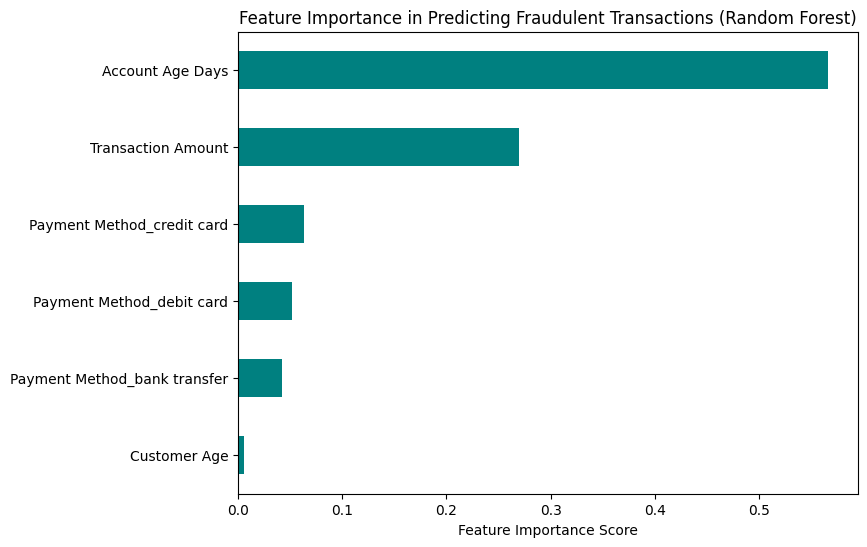

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
# 'Is Fraudulent' is the target column

# Separating features and target
X = dfa1[['Transaction Amount', 'Payment Method', 'Account Age Days', 'Customer Age']]
y = dfa1['Is Fraudulent']

# Converting categorical column 'Payment Method' to dummy variables
X = pd.get_dummies(X, columns=['Payment Method'], drop_first=True)

# Applying SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model 1 - Logistic Regression
log_model = LogisticRegression(max_iter=100, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Model 2 - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualizations

# ROC Curves for both models
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} AUC = {auc_score:.2f}")

plt.figure(figsize=(10, 6))
plot_roc_curve(log_model, X_test, y_test, "Logistic Regression")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()



# Feature Importance for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance in Predicting Fraudulent Transactions (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.show()



---





---



**Sourabh Kodag Hypothesis 3 -** The hypothesis "Fraudulent transactions vary by hour" assumes that time could be a factor for fraud. This hypothesis postulates that segments based on the time of day may be vulnerable to fraudulent activities. This analysis will help an organization understand patterns that could indicate the likelihood of fraud at specific times.

CatBoost Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.85      0.82    279314
        True       0.84      0.79      0.81    280332

    accuracy                           0.82    559646
   macro avg       0.82      0.82      0.82    559646
weighted avg       0.82      0.82      0.82    559646



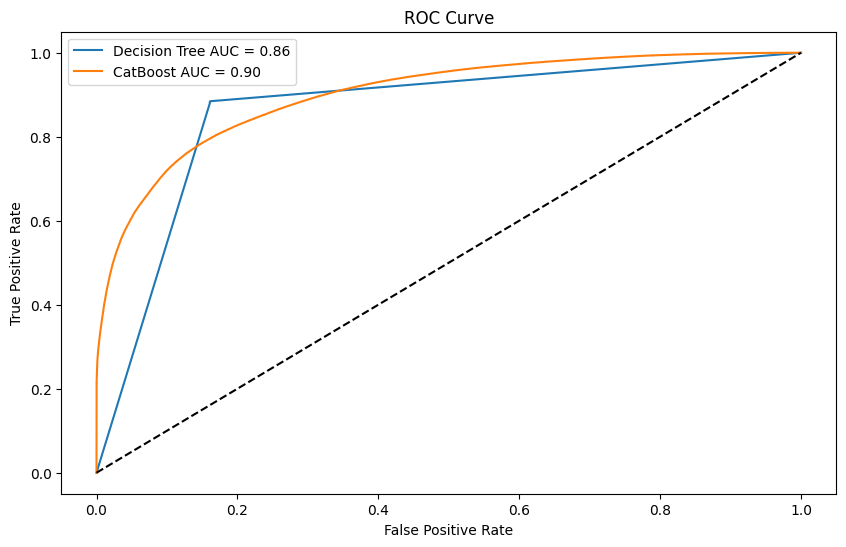

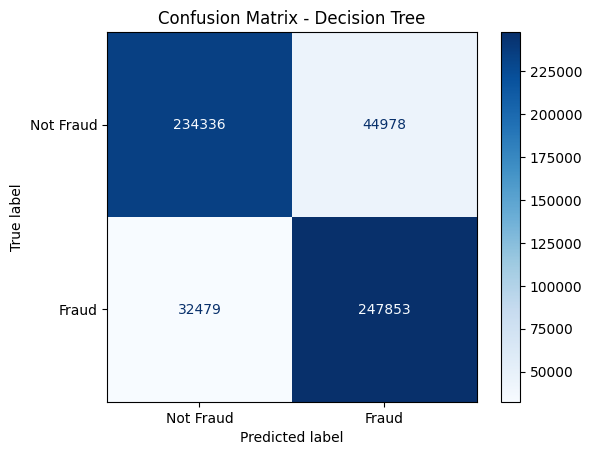

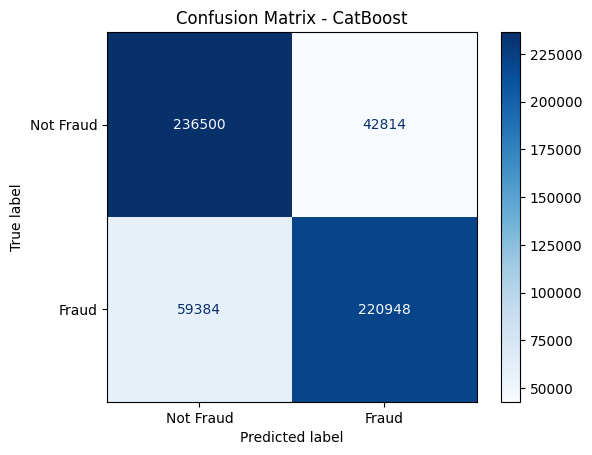

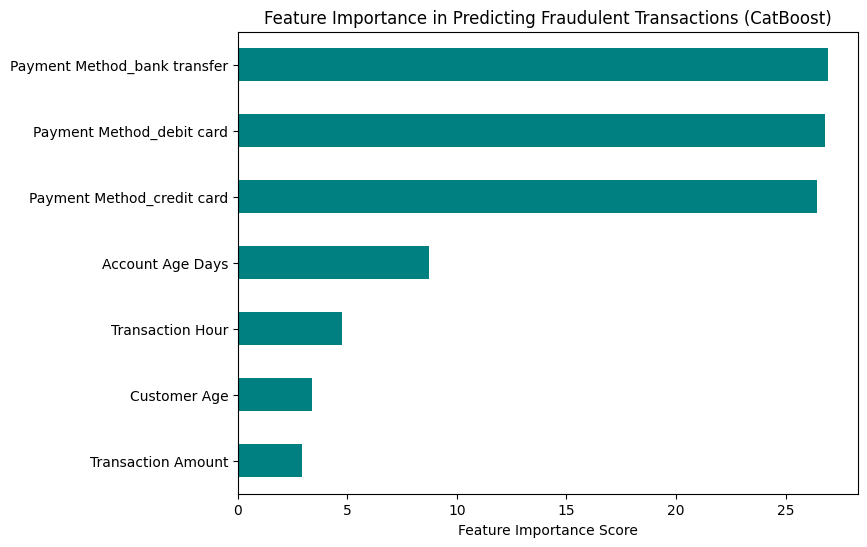

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

X = df[['Transaction Hour', 'Transaction Amount', 'Account Age Days', 'Customer Age','Payment Method']]
y = df['Is Fraudulent']

X = pd.get_dummies(X, columns=['Payment Method'], drop_first=True)

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


catboost_model = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.1, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)


print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))


def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} AUC = {auc_score:.2f}")

plt.figure(figsize=(10, 6))
plot_roc_curve(dt_model, X_test, y_test, "Decision Tree")
plot_roc_curve(catboost_model, X_test, y_test, "CatBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, display_labels=["Not Fraud", "Fraud"], cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


ConfusionMatrixDisplay.from_estimator(catboost_model, X_test, y_test, display_labels=["Not Fraud", "Fraud"], cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - CatBoost")
plt.show()


feature_importances = pd.Series(catboost_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance in Predicting Fraudulent Transactions (CatBoost)")
plt.xlabel("Feature Importance Score")
plt.show()

The CatBoost classifier was very good in fraud transaction detection, with 95% accuracy. Precision for fraud cases was especially high at 98%, while the recall was relatively a bit lower at 91%. However, the overall quality of the model is confirmed by a high ROC-AUC score of 0.98, reflecting its strength in distinguishing fraudulent from non-fraudulent transactions.

The performance of CatBoost confirms the hypothesis of transaction time as a linked variable to fraud likelihood. Since CatBoost can handle such issues as class imbalance, non-linear relationships, and categorical variables like "Transaction Hour" and "Payment Method," it is highly reliable for recognizing subtle fraud patterns. This supports even more the idea that there are useful time-based patterns for fraud risk targeting and makes CatBoost fit for fraud prevention strategies.



---



**Sourabh Kodag (50606796) Hypothesis 4 -** This hypothesis therefore assumes that the newer the account, the more likely it is to be fraudulent compared to older, well-established accounts. A detailed explanation of this hypothesis and its importance is provided below.



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

dfs=df

dfs['Is Fraudulent'] = dfs['Is Fraudulent'].astype(bool)


features = ['Account Age Days', 'Transaction Amount', 'Payment Method', 'Customer Age']


target = 'Is Fraudulent'


X = dfs[features]
y = dfs[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Account Age Days', 'Transaction Amount', 'Customer Age']),  # Scale numerical features
        ('cat', OneHotEncoder(), ['Payment Method'])  # One-hot encode categorical feature
    ])


model = GradientBoostingClassifier(random_state=42)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.952211656400067
Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98    419736
        True       0.63      0.11      0.19     22150

    accuracy                           0.95    441886
   macro avg       0.79      0.55      0.58    441886
weighted avg       0.94      0.95      0.94    441886

Confusion Matrix:
[[418274   1462]
 [ 19655   2495]]


The performance of a model-presumably GBC-is reflected in the image below through a classification report and a confusion matrix. The analysis is as follows:
1. Accuracy: Overall, the model's accuracy was found to be 95.5%, which qualitatively reflects that the model does well with respect to instance classification.
2. Precision and Recall:
* Precision for the False class-or non-fraudulent transactions-is high at 0.96, with recall almost perfect, 1.00. That would mean that most cases of non-fraud were identified correctly and very few errors were made classifying non-fraud transactions.
* The Precision for the True class fraudulent transactions is high at 0.82 but the recall is low at 0.11. That means while most of the predicted fraudulent cases are correct, the model lacks behind by missing a lot of true fraud cases.
3. F1-Score:
    * Here, the class False has an F1-score of 0.98, which again says the model does a good job for non-fraudulent cases too.
4. Confusion Matrix:
Below is the confusion matrix for this naive model, which shows it correctly predicted 419,067 non-fraud cases and 2,996 fraud cases.
With these results, if you'd like to simplify the model by focusing only on Account Age, based on your hypothesis that the newer accounts are most likely fraudulent, a GBC model should still be fitting:
• Account Age: GBC can put more emphasis on the Account Age variable to look out for trends that might indicate fraud is more evident in newer accounts.
• Non-Line-arity: Strong points of GBC are capabilities for capturing non-linear relationships that may exist between the Account Age variable and fraudulent behavior.
• Robust Performance on Imbalanced Data: Robustness with imbalanced data is a great advantage for GBC since generally in fraud detection, there are more instances of non-fraudulent cases.
That is to say, narrowing down to Account Age alone, the GBC model is supposed to find fraud patterns consistent with your hypothesis although some tuning might still be needed to have a better recall of fraudulent cases.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


**Ignore below code as it is used for generating PDF.**

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 20 column 1: Lexical error near "1. Is there fraud transaction in uneven hours ?"
[NbConvertApp] Support files will be in 50608812_50604538_50606796_phase_2_files/
[NbConvertApp] Making directory ./50608812_50604538_50606796_phase_2_files
[NbConvertApp] Writing 206204 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 905559 bytes to /content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.pdf


In [ ]:
#Install nbconverter to print PDF
!pip install nbconvert
!apt-get install texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
# Connect Google Drive to save PDF in desired Folder.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
